## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

In [7]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
dfq =  pd.read_csv('cleaned_data.csv') 

### Data quality check
*By Izzy Podolsky*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

**Because of the amount of variables (3000) in the college scorecard dataframe, we had to intuitively select columns before performing the data quality check. Otherwise, it would have been too expensive computationally. Below are the results from the columns the group selected.**

In [7]:
#...Distribution of continuous variables...#

In [2]:
dfq.describe()

,act_avg,zip,rankingDisplayScore,percent_receiving_aid,cost_after_aid,rankingSortRank,hs_gpa_avg,xwalkId,businessRepScore,tuition,...,avg_cost,instante_tuition,outstate_tuition,tuition_revenue_per,instructional_expenditure_per,avg_faculty_salary,ft_faculty_rate,avg_net_price,number_titleIV,sat_avg
count,291.000000,300.000000,230.000000,143.000000,143.000000,300.000000,243.000000,300.000000,233.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,298.000000
mean,23.024055,46699.376667,50.465217,35.279720,33920.867133,86.763333,3.546502,179281.906667,2.834335,31733.660000,...,35846.770000,21944.946667,31682.810000,15438.420000,16758.043333,10374.606667,0.732048,20449.466667,1304.170000,1218.808725
std,4.159257,29257.233119,18.084134,17.163426,7625.493383,75.336440,0.248005,45977.818478,0.590825,11721.751389,...,17509.128816,16689.315150,11796.239127,8179.364727,16437.384128,2727.958684,0.186160,7666.600135,845.742792,142.324641
min,15.000000,1003.000000,27.000000,5.000000,13186.000000,-1.000000,2.900000,100663.000000,2.000000,5460.000000,...,13401.000000,4831.000000,5460.000000,3860.000000,1997.000000,4805.000000,0.070900,3901.000000,69.000000,788.000000
25%,20.000000,21242.000000,36.000000,21.000000,28613.000000,5.000000,3.400000,145385.000000,2.400000,22537.500000,...,22226.500000,9003.250000,21880.750000,9108.000000,9224.750000,8450.000000,0.612725,14562.750000,608.500000,1122.000000
50%,22.000000,44178.500000,47.000000,35.000000,34621.000000,79.500000,3.500000,179513.000000,2.700000,28859.000000,...,27258.500000,13065.000000,28873.500000,13189.000000,12229.000000,9905.500000,0.750800,18466.000000,1108.500000,1198.500000
75%,26.000000,74348.000000,61.000000,47.000000,38936.000000,152.250000,3.700000,213150.750000,3.200000,41490.500000,...,51642.000000,38563.500000,41534.750000,20396.250000,17050.750000,11750.000000,0.868925,25719.250000,1894.500000,1314.500000
max,34.000000,99775.000000,100.000000,81.000000,51810.000000,223.000000,4.000000,482149.000000,4.800000,57208.000000,...,72717.000000,57208.000000,57208.000000,39806.000000,120956.000000,22924.000000,1.000000,41849.000000,3915.000000,1558.000000


In [8]:
#...Distribution of categorical variables...#

There are no relevant categorical variables in the dataset.

In [9]:
#...Association of the response with the predictors...#

In [3]:
dfq.corrwith(dfq['rankingSortRank'])

act_avg                         -0.214557
zip                              0.017698
rankingDisplayScore             -0.958548
percent_receiving_aid           -0.020509
cost_after_aid                   0.282787
rankingSortRank                  1.000000
hs_gpa_avg                       0.016904
xwalkId                         -0.053208
rankingIsTied                    0.674597
businessRepScore                -0.194834
tuition                         -0.143643
engineeringRepScore             -0.377568
overallRank                      1.000000
primaryKey                      -0.070244
OPEID6                          -0.007162
branches                         0.031321
region                           0.002808
admission_rate                   0.328866
satCR25                         -0.187671
satCR75                         -0.155943
satmt25                         -0.221994
satmt75                         -0.156629
satcrmid                        -0.176642
satmtmid                        -0

### Data cleaning
*By Peggy Han*

For data cleaning, we performed the following:

1. Some of the columns only have NaN values, so we removed all these variables to make the data set simpler. We also dropped some irrelevant variables that wouldn't help with developing the model.

2. In the second dataset from obtained from College Scorecard, there are about 3000 different variables. We manually selected some variables that might be relevant to be response based on the variable description.

3. When merging the two data sets, we found that some of the rows are duplicated in the resulting data frame because more than one insitution in the second dataset has the same school code, and some schools have different codes in the two data sets, so they have missing columns from the second data set. We did some manual deletion and filling in of the merged data.

4. We identified that some of the institutions were unranked in the Kaggle data set, so we dropped those rows. We also dropped columns with only 1 unique value as they do not provide insight for building the model.

5. Some of the variables from the Collge Scorecard data contains the same information are separately stored into private and public columns. For private schools, the information is stored in the private column and the public column is NaN, and vice versa. We combined these columns to use the variable as a predictor with no NaN values in the column.

6. Both data sets contain the information for average SAT score, enrollment, and admission rate information. We think the data from College Scorecard is more accurate, so we prioritize the College Scorecard data and use the kaggle data to fill in some of the missing values in the College Scorecard column to minimize the number of missing values in the variables.

The code below implements the above cleaning.

In [2]:
df1 = pd.read_json('project_data/schoolInfo.json')

In [3]:
# Dropped columns which only have NaN values
df1.dropna(axis=1, how='all', inplace=True)

# Dropped irrelevant variables
df1 = df1.drop(['nonResponderText', 'nonResponder', 'primaryPhoto', 'primaryPhotoThumb', 'aliasNames', 'urlName'], 
         axis = 1)

In [4]:
df2 = pd.read_csv('project_data/MERGED2017_18_PP.csv')

/var/folders/vk/7c21x7qj4fv7flh8p9m2wwn00000gn/T/ipykernel_86468/539635706.py:1: DtypeWarning: Columns (1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('project_data/MERGED2017_18_PP.csv')


In [6]:
# Manually selected some variables that seem relevant based on description
df2_slice = df2[['OPEID6','INSTNM','SCH_DEG','NUMBRANCH','PREDDEG','HIGHDEG','REGION','ADM_RATE','SATVR25','SATVR75','SATMT25',
                'SATMT75','SATWR25','SATWR75','SATVRMID','SATMTMID','SATWRMID','ACTCM25','ACTCM75','ACTEN25',
                'ACTEN75','ACTMT25','ACTMT75','ACTWR25','ACTWR75','ACTCMMID','ACTENMID','ACTMTMID','ACTWRMID',
                'SAT_AVG','UGDS','UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI',
                'UGDS_2MOR','UGDS_NRA','UGDS_UNKN','PPTUG_EF','NPT4_PUB','NPT4_PRIV','NUM4_PUB','NUM4_PRIV',
                'NUM4_PROG','NUM4_OTHER','COSTT4_A','COSTT4_P','TUITIONFEE_IN','TUITIONFEE_OUT','TUITIONFEE_PROG',
                'TUITFTE','INEXPFTE','AVGFACSAL','PFTFAC']]

# Dropped columns with only NA
df2_slice.dropna(axis=1, how='all', inplace=True)

# Use the school code to create a matching column to merge the two datasets
df2_slice['primaryKey'] = df2_slice['OPEID6']

result = pd.merge(df1, df2_slice, on='primaryKey', how="left", indicator = True)
result.shape

/var/folders/vk/7c21x7qj4fv7flh8p9m2wwn00000gn/T/ipykernel_86468/122189018.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_slice.dropna(axis=1, how='all', inplace=True)
/var/folders/vk/7c21x7qj4fv7flh8p9m2wwn00000gn/T/ipykernel_86468/122189018.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_slice['primaryKey'] = df2_slice['OPEID6']


(420, 78)

In [7]:
# Identified duplicated rows
duplicated = result[result['primaryKey'].duplicated(keep=False)]
duplicated.shape

(148, 78)

In [17]:
# Downloaded data to perform manual selection
#result.to_csv('processed_data_1.csv', index=False)
#duplicated.to_csv('duplicated_1.csv', index=False)

# Read the manually processed data
data = pd.read_csv('project_data/processed_data1.csv')

In [18]:
# Identified unranked institutions
data.loc[data.rankingDisplayRank == "Unranked"]

,act-avg,sat-avg,enrollment,city,sortName,zip,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,...,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,_merge
300,NaN,NaN,1264.0,San Diego,alliantinternationaluniversity,92131,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
301,NaN,NaN,NaN,Orange,argosyuniversity,92868,NaN,NaN,NaN,NaN,...,29396.0,NaN,13438.0,13438.0,NaN,16793.0,6133.0,5460.0,0.1774,both
302,NaN,NaN,NaN,San Francisco,californiainstituteofintegralstudies,94103,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22916.0,13260.0,8190.0,0.3247,both
303,NaN,NaN,NaN,Minneapolis,capellauniversity,55403,NaN,NaN,NaN,NaN,...,19836.0,NaN,14250.0,14250.0,NaN,16533.0,1714.0,6841.0,0.1387,both
304,NaN,NaN,NaN,Pocatello,idahostateuniversity,83209,NaN,NaN,NaN,NaN,...,19592.0,NaN,7166.0,21942.0,NaN,7822.0,11741.0,7156.0,0.9380,both
305,NaN,NaN,133.0,San Diego,northcentraluniversity,86314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16529.0,2909.0,6347.0,0.2204,left_only
306,NaN,NaN,NaN,Cypress,tridentuniversityinternational,90630,96.0,NaN,NaN,NaN,...,17544.0,NaN,9240.0,9240.0,NaN,9361.0,1828.0,5705.0,0.0614,both
307,NaN,NaN,NaN,Cincinnati,unioninstituteanduniversity,45206,NaN,NaN,NaN,NaN,...,24696.0,NaN,12896.0,12896.0,NaN,16910.0,6638.0,5540.0,0.1690,both
308,NaN,NaN,NaN,Phoenix,universityofphoenix,85034,NaN,NaN,NaN,NaN,...,20083.0,NaN,9608.0,9608.0,NaN,13180.0,2042.0,4485.0,0.0462,left_only
309,NaN,NaN,NaN,Minneapolis,waldenuniversity,55401,NaN,NaN,NaN,NaN,...,NaN,NaN,12465.0,12465.0,NaN,10183.0,2854.0,6769.0,0.0674,both


In [19]:
# Removed unranked institutions
data.drop(index = range(300,311), inplace = True)

# Dropped columns with only NA
data.dropna(axis=1, how='all', inplace=True)

# Drop columns with only 1 unique value
cols_to_drop = []
for col in data.columns:
    if data[col].nunique() == 1:
        cols_to_drop.append(col)
data.drop(cols_to_drop, axis=1, inplace = True)

In [20]:
# Combined columns that have the same information but stored separately for public and private institutions
data['NPT4'] = data['NPT4_PUB'].fillna(data['NPT4_PRIV'])
data['NUM4'] = data['NUM4_PUB'].fillna(data['NUM4_PRIV'])

# Dropped already combined columns and _merge
data.drop(['_merge','NPT4_PUB','NPT4_PRIV','NUM4_PUB','NUM4_PRIV'], axis=1, inplace=True)

In [21]:
# Create a new colume that contains SAT Average 
# Filled missing values in College Scorecard SAT average with values of SAT average from the Kaggle data 
# to minimize number of missing values
data['sat_avg'] = data['SAT_AVG'].fillna(data['sat-avg'])

# Dropped the two original columns
data.drop(['SAT_AVG','sat-avg'], axis=1, inplace=True)

In [22]:
# With the same principle, we will use enrollment data from college scorecard instead of Kaggle
# Dropped Kaggle enrollment data
data.drop(['enrollment'], axis=1, inplace=True)

In [23]:
# Rename variables to more interpretable names
data = data.rename(columns = {
    'act-avg': 'act_avg',
    'acceptance-rate': 'acceptance_rate',
    'percent-receiving-aid': 'percent_receiving_aid',
    'cost-after-aid': 'cost_after_aid',
    'hs-gpa-avg': 'hs_gpa_avg', 
    'INSTNM': 'institution_name',
    'NUMBRANCH': 'branches', 
    'REGION': 'region',
    'ADM_RATE': 'admission_rate',
    'SATVR25': 'satCR25', 
    'SATVR75': 'satCR75',
    'SATMT25': 'satmt25',
    'SATMT75': 'satmt75',
    'SATVRMID': 'satcrmid', 
    'SATMTMID': 'satmtmid',
    'ACTCM25': 'actcm25',
    'ACTCM75': 'actcm75',
    'ACTEN25': 'acten25', 
    'ACTEN75': 'acten75',
    'ACTMT25': 'actmt25',
    'ACTMT75': 'actmt75',
    'ACTCMMID': 'actcmmid', 
    'ACTENMID': 'actenmid',
    'ACTMTMID': 'actmtmid',
    'UGDS': 'enrollment', 
    'UGDS_WHITE': 'percent_white',
    'UGDS_BLACK': 'percent_black',
    'UGDS_HISP': 'percent_hispanic',
    'UGDS_ASIAN': 'percent_asian', 
    'UGDS_AIAN': 'percent_aian',
    'UGDS_NHPI': 'percent_nhpi', 
    'UGDS_2MOR': 'percent_twoormore',
    'UGDS_NRA': 'percent_nra',
    'UGDS_UNKN': 'percent_unknown', 
    'PPTUG_EF': 'percent_parttime',
    'COSTT4_A': 'avg_cost',
    'TUITIONFEE_IN': 'instante_tuition', 
    'TUITIONFEE_OUT': 'outstate_tuition',
    'TUITFTE': 'tuition_revenue_per', 
    'INEXPFTE': 'instructional_expenditure_per', 
    'AVGFACSAL': 'avg_faculty_salary', 
    'PFTFAC': 'ft_faculty_rate', 
    'NPT4': 'avg_net_price', 
    'NUM4': 'number_titleIV'
}
                  )

In [24]:
# Identified missing value in admission_rate
missing = data['admission_rate'].isna()
na_rows = data[missing]
na_rows

,act_avg,city,sortName,zip,acceptance_rate,rankingDisplayScore,percent_receiving_aid,cost_after_aid,state,rankingSortRank,...,avg_cost,instante_tuition,outstate_tuition,tuition_revenue_per,instructional_expenditure_per,avg_faculty_salary,ft_faculty_rate,avg_net_price,number_titleIV,sat_avg
263,16.0,Nashville,tennesseestateuniversity,37209,53.0,NaN,NaN,NaN,TN,-1,...,19058.0,7776.0,21132.0,6877.0,8732.0,7310.0,0.9707,11083.0,609.0,788.0


In [25]:
# Filled in missing value in College Scorecard admission rate data with Kaggle acceptance rate data
ar = data.loc[263, 'acceptance_rate']/100
data.at[263, 'admission_rate'] = ar
data.drop(['acceptance_rate'], axis=1, inplace=True)

In [ ]:
# Downloaded cleaned data
data.to_csv('cleaned_data.csv', index=False)

### Data preparation
*By Izzy Podolsky*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. We have imported the necessary packages / created a numpy seed to prepare the data for LOOCV cross validation.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
np.random.seed(100)
loocv = LeaveOneOut()

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

_EDA by Izzy Podolsky_

In [5]:
dfeda = pd.read_csv('/Users/isabelpodolsky/Desktop/newdata.csv')
dfeda.head()

,act_avg,city,zip,percent_receiving_aid,cost_after_aid,state,rankingSortRank,hs_gpa_avg,businessRepScore,tuition,...,avg_cost,instante_tuition,outstate_tuition,tuition_revenue_per,instructional_expenditure_per,avg_faculty_salary,ft_faculty_rate,avg_net_price,number_titleIV,sat_avg
0,32.0,Princeton,8544,60.0,16793.0,NJ,1,3.9,NaN,47140,...,64390.0,47140.0,47140.0,13216.0,53658.0,17519.0,0.8490,10027.0,346.0,1500.0
1,32.0,Cambridge,2138,55.0,16338.0,MA,2,4.0,NaN,48949,...,66900.0,48949.0,48949.0,31930.0,43823.0,19741.0,0.8589,14327.0,350.0,1523.0
2,32.0,Chicago,60637,42.0,27767.0,IL,3,4.0,NaN,54825,...,72717.0,56034.0,56034.0,28508.0,89151.0,18115.0,0.8239,25455.0,494.0,1524.0
3,32.0,New Haven,6520,50.0,18385.0,CT,3,NaN,NaN,51400,...,68950.0,51400.0,51400.0,17934.0,120956.0,17517.0,0.7459,18627.0,387.0,1520.0
4,32.0,New York,10027,48.0,21041.0,NY,5,NaN,NaN,57208,...,71972.0,57208.0,57208.0,37294.0,89742.0,18713.0,0.4688,24231.0,526.0,1522.0


<AxesSubplot:xlabel='rankingSortRank', ylabel='Count'>

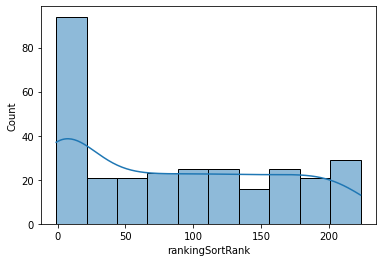

In [15]:
sns.histplot(dfeda.rankingSortRank, kde = True)

Obviously, something is wrong here. Ranking should be evenly distributed, but instead it has a right skew. Is this due to 0 values?

In [16]:
dfeda.rankingSortRank.value_counts()

-1      70
 207     9
 223     8
 124     8
 216     7
        ..
 132     1
 67      1
 68      1
 2       1
 1       1
Name: rankingSortRank, Length: 61, dtype: int64

The value seems to be -1, so there must be an error. These values should be dropped.

In [17]:
dfeda = dfeda.loc[dfeda.rankingSortRank > 0,:]

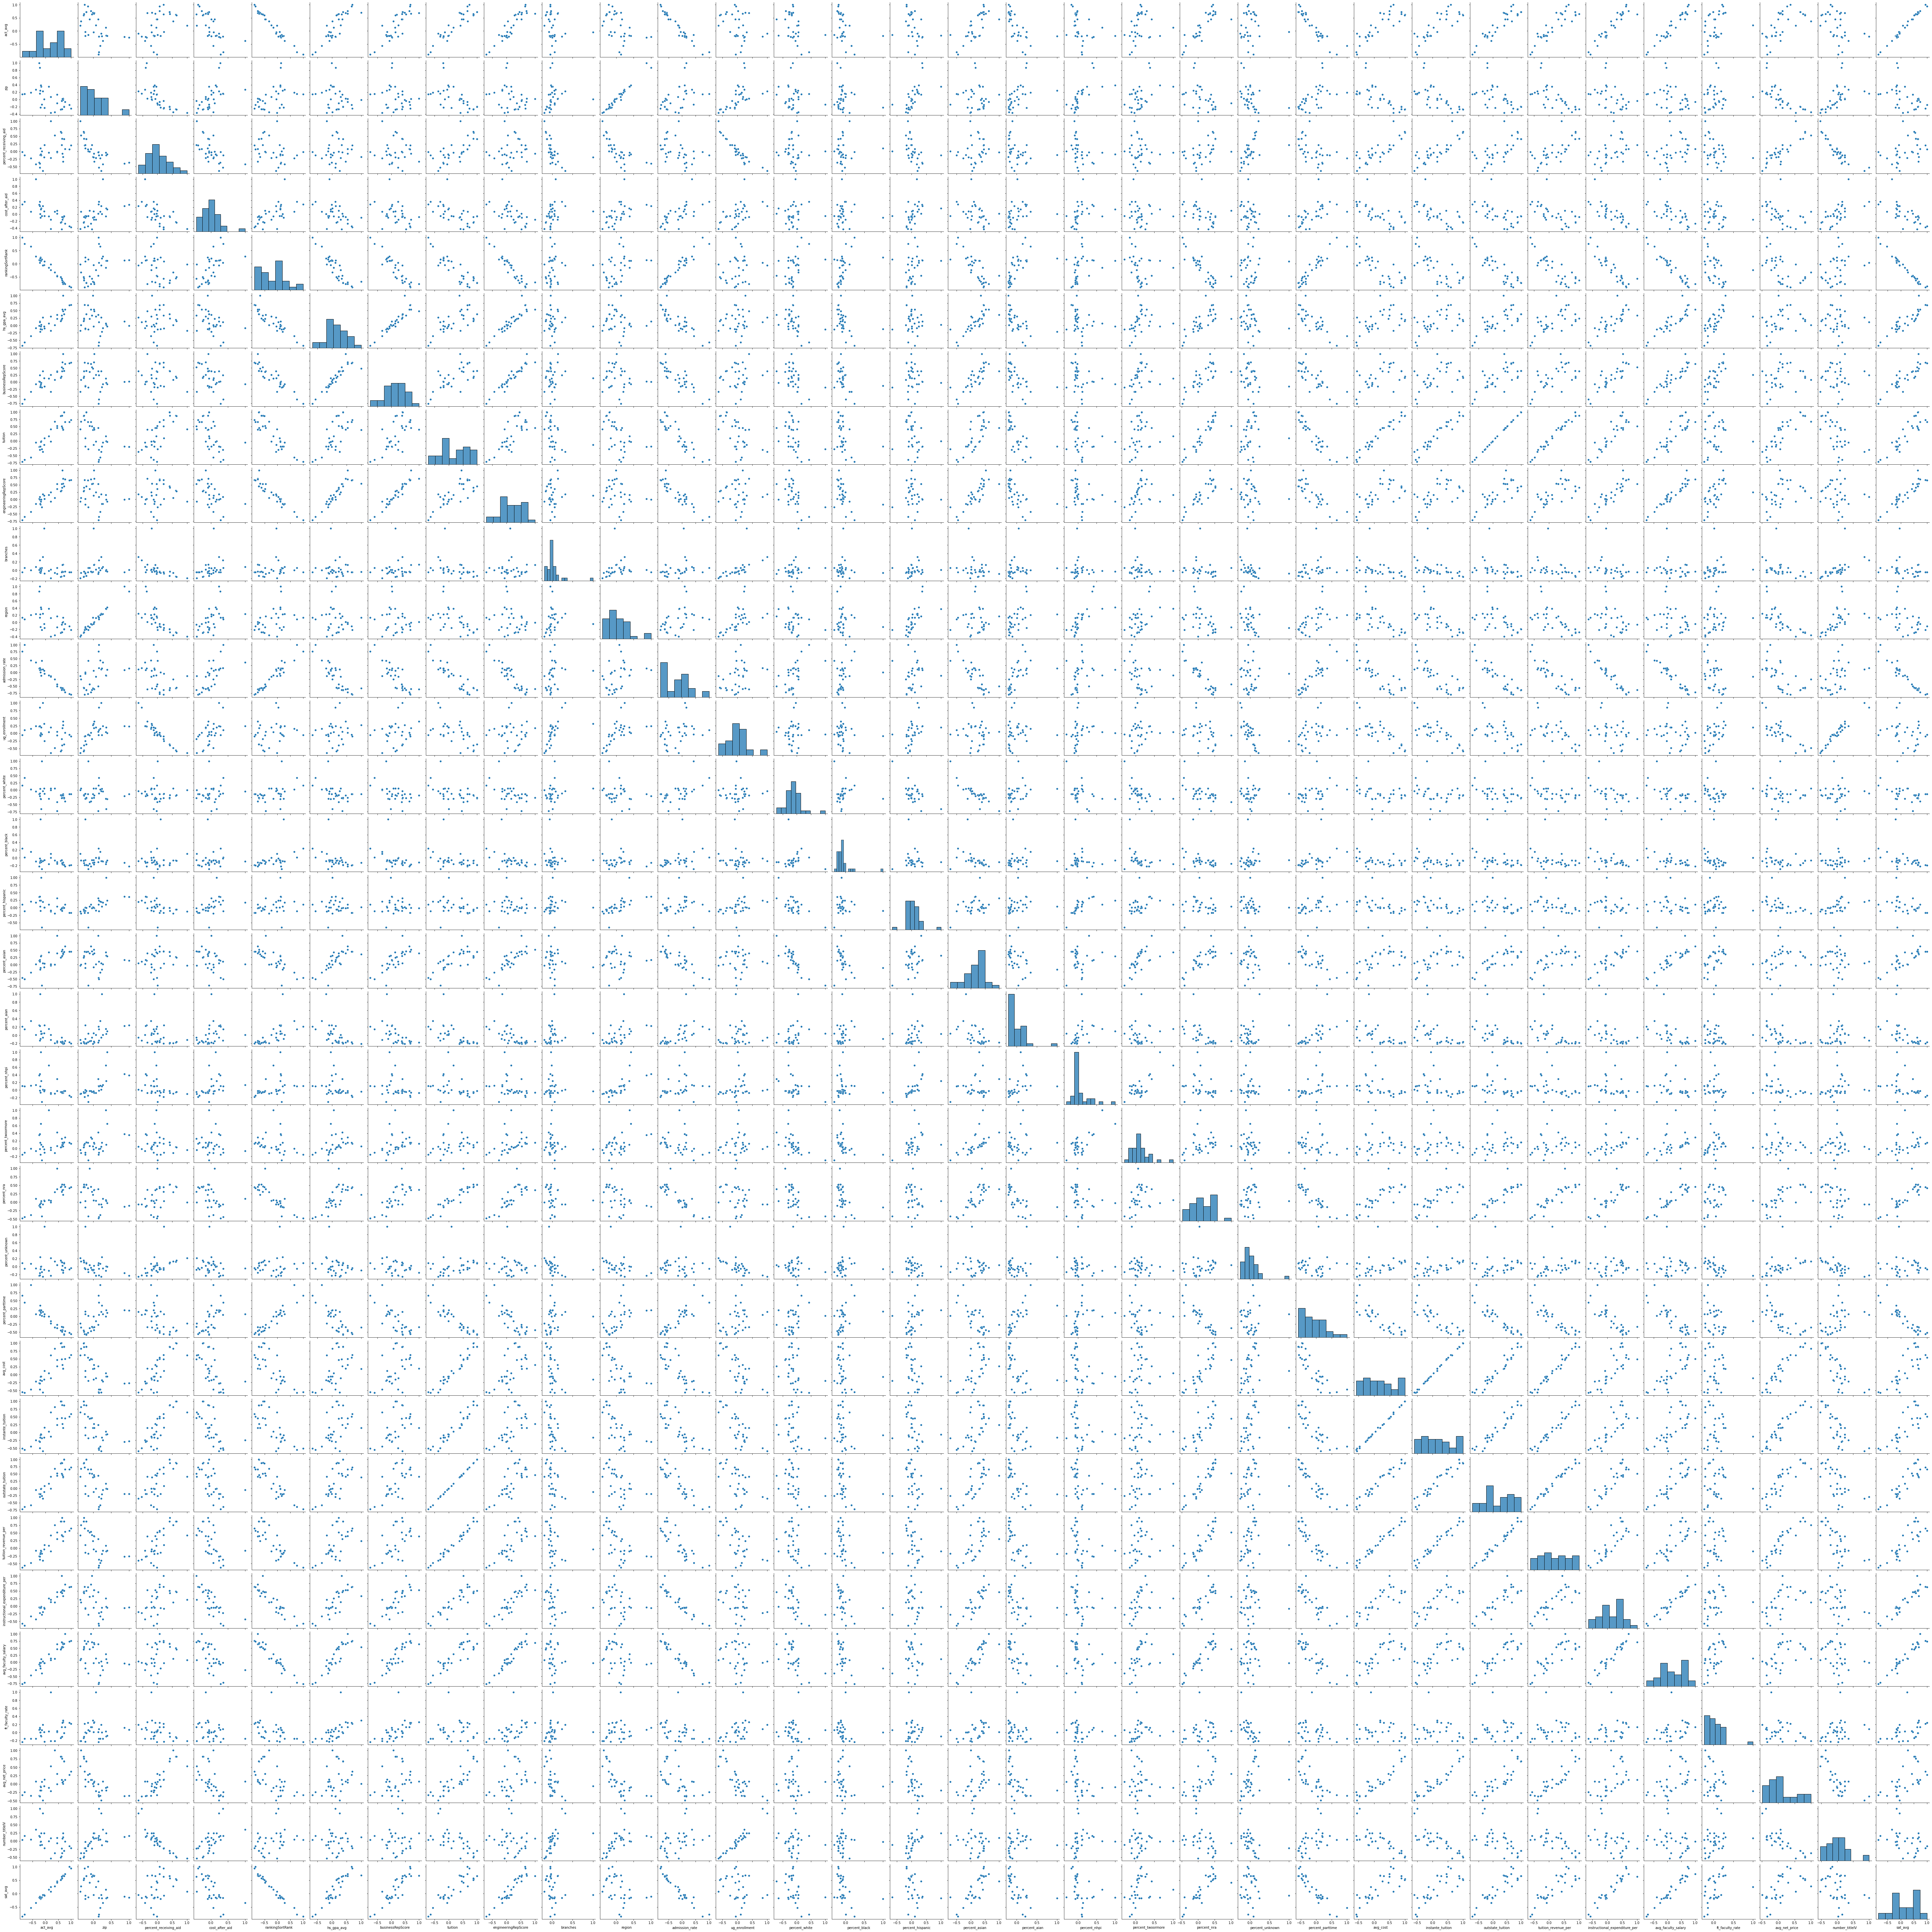

In [21]:
sns.pairplot(dfeda.corr()) #checking for relationships

Main takeaway: lots of multicollinearity, variable relationships w/ target either linear or random (thus no transformations necessary). See examples below:

<AxesSubplot:xlabel='tuition', ylabel='rankingSortRank'>

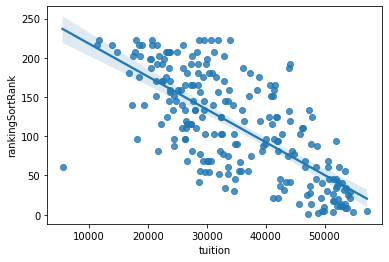

In [18]:
sns.regplot(x = 'tuition', y = 'rankingSortRank', data = dfeda) #pretty accurate negative linear relationship 

<AxesSubplot:xlabel='act_avg', ylabel='rankingSortRank'>

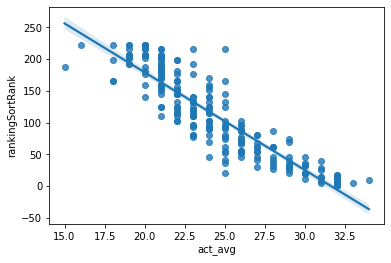

In [19]:
sns.regplot(x = 'act_avg', y = 'rankingSortRank', data = dfeda) #pretty accurate negative linear relationship 

### Variable Selection
_Variable Selection by Shray Vaidya_

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def vif(X):
    X = add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    for i in range(len(X.columns)):
        vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

    print(vif_data)

In [25]:
#Creating the necessary dataset without the target variable and identifiers
data = pd.read_csv("newdata.csv")
X = data.drop(columns = ["rankingSortRank", "city", "displayName", "institution_name", "state", "zip", "institutionalControl"]).fillna(0)

In [26]:
vif(X)

                          feature           VIF
0                           const  1.669937e+08
1                         act_avg  3.049020e+00
2           percent_receiving_aid  4.467103e+00
3                  cost_after_aid  5.062501e+00
4                      hs_gpa_avg  1.280359e+00
5                businessRepScore  1.886738e+00
6                         tuition  3.742087e+01
7             engineeringRepScore  1.937366e+00
8                        branches  1.222726e+00
9                          region  1.967305e+00
10                 admission_rate  3.274675e+00
11                  ug_enrollment  7.612714e+00
12                  percent_white  6.911781e+06
13                  percent_black  3.876436e+06
14               percent_hispanic  2.748378e+06
15                  percent_asian  1.139021e+06
16                   percent_aian  1.618992e+04
17                   percent_nhpi  8.407448e+02
18              percent_twoormore  7.311039e+04
19                    percent_nra  4.569

There is clearly high multicollinearity among the variables as can be seen by the high VIF values in the output above. Therefore, we will proceed by dropping variables with high VIF one by one until we see all VIF values below 10.

In [28]:
#Removing one variable and recomputing
X2 = X.drop(columns = ["percent_white"])
vif(X2)

                          feature         VIF
0                           const  395.999165
1                         act_avg    3.045146
2           percent_receiving_aid    4.460297
3                  cost_after_aid    5.047475
4                      hs_gpa_avg    1.280353
5                businessRepScore    1.872288
6                         tuition   37.201285
7             engineeringRepScore    1.917015
8                        branches    1.220510
9                          region    1.960434
10                 admission_rate    3.272242
11                  ug_enrollment    7.607018
12                  percent_black    1.809298
13               percent_hispanic    1.969078
14                  percent_asian    3.067999
15                   percent_aian    1.289839
16                   percent_nhpi    2.365980
17              percent_twoormore    2.495946
18                    percent_nra    1.873055
19                percent_unknown    1.377944
20               percent_parttime 

In [30]:
#Removing one variable and recomputing
X3 = X2.drop(columns = ["outstate_tuition"])
vif(X3)

                          feature         VIF
0                           const  390.413988
1                         act_avg    3.039627
2           percent_receiving_aid    4.380926
3                  cost_after_aid    4.827735
4                      hs_gpa_avg    1.268006
5                businessRepScore    1.867853
6                         tuition   10.641842
7             engineeringRepScore    1.913406
8                        branches    1.217984
9                          region    1.945575
10                 admission_rate    3.271547
11                  ug_enrollment    7.572311
12                  percent_black    1.808571
13               percent_hispanic    1.965298
14                  percent_asian    3.063579
15                   percent_aian    1.289181
16                   percent_nhpi    2.358566
17              percent_twoormore    2.488933
18                    percent_nra    1.866442
19                percent_unknown    1.375306
20               percent_parttime 

In [31]:
#Removing one variable and recomputing
X4 = X3.drop(columns = ["instante_tuition"])
vif(X4)

                          feature         VIF
0                           const  365.328395
1                         act_avg    3.038951
2           percent_receiving_aid    4.147568
3                  cost_after_aid    4.505080
4                      hs_gpa_avg    1.245130
5                businessRepScore    1.818512
6                         tuition   10.565568
7             engineeringRepScore    1.908465
8                        branches    1.217872
9                          region    1.928223
10                 admission_rate    3.271038
11                  ug_enrollment    7.340956
12                  percent_black    1.775476
13               percent_hispanic    1.936874
14                  percent_asian    3.048811
15                   percent_aian    1.289169
16                   percent_nhpi    2.301372
17              percent_twoormore    2.471357
18                    percent_nra    1.862369
19                percent_unknown    1.367356
20               percent_parttime 

In [32]:
#Removing one variable and recomputing
X5 = X4.drop(columns = ["avg_cost"])
vif(X5)

                          feature         VIF
0                           const  365.233496
1                         act_avg    3.031350
2           percent_receiving_aid    3.470628
3                  cost_after_aid    3.986779
4                      hs_gpa_avg    1.235539
5                businessRepScore    1.737838
6                         tuition    8.176343
7             engineeringRepScore    1.908442
8                        branches    1.216740
9                          region    1.891410
10                 admission_rate    3.156647
11                  ug_enrollment    6.895142
12                  percent_black    1.772312
13               percent_hispanic    1.935208
14                  percent_asian    2.982678
15                   percent_aian    1.286512
16                   percent_nhpi    2.281169
17              percent_twoormore    2.453997
18                    percent_nra    1.779659
19                percent_unknown    1.359141
20               percent_parttime 

After removing the variables avg_cost, percent_white, outstate_tuition, and instante_tuition, all the VIF values have come to below 10. Therefore, we have removed high multicollinearity.

### Variable selection through backwards stepwise method
_By Izzy Podolsky_

In [11]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import itertools
df = pd.read_csv('/Users/isabelpodolsky/Desktop/newdata.csv')
df = df.select_dtypes([np.number]) #removes all categorical bc none are intuitively important to the regression (i.e. all of them are school identifiers, not statistics)

In [12]:
def processSubset(predictor_subset):
    model = smf.ols('rankingSortRank~' + '+'.join(predictor_subset),data = df).fit()
    bic = model.bic
    return {"model":model, "b":bic}

def backward(predictors):
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['b'].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model
def backward_selection():
    models_best = pd.DataFrame(columns=["b", "model"], index = range(1,len(df.drop('rankingSortRank', axis = 1).columns)))
    predictors = df.drop('rankingSortRank', axis = 1).columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]
    model_best = models_best.loc[models_best.b == models_best.b.min()]
    return model_best.iloc[0]

In [13]:
modelbest = backward_selection()
modelbest = modelbest['model']

In [14]:
modelbest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        rankingSortRank   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     65.77
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           8.73e-28
Time:                        14:57:04   Log-Likelihood:                -307.00
No. Observations:                  76   AIC:                             630.0
Df Residuals:                      68   BIC:                             648.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             366.4696     49.501      7.403      0.000     267.691     465.248
act_avg                -6.5202      1.156     -5.641      0.000      -8.827      -4.214
cost_after_aid         -0.0003      0.000     -1.055      0.295      -0.001       0.000
hs_gpa_avg            -12.5191     12.471     -1.004      0.319     -37.404      12.366
businessRepScore      -23.1279      4.155     -5.567      0.000     -31.418     -14.838
engineeringRepScore    -2.8606      3.766     -0.760      0.450     -10.375       4.654
admission_rate         28.3898     13.681      2.075      0.042       1.090      55.690
percent_parttime      103.3811     37.622      2.748      0.008      28.307     178.455
==============================================================================
Omnibus:                        1.981   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.460
Skew:                          -0.122   Prob(JB):                        0.482
Kurtosis:                       2.366   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The difference between the model with variable selection and the model without is not very significant, and there are insignificant variables in the backward selection as well. However, it does reveal some factors to watch for, such as act_avg and percent_parttime. Importantly, no variables dropped during VIF proved important through this selection.

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

# Developing main model for LOOCV 

*By Mingyi Gong*

We will first develop loocv to classify different observations to different categories. Many observations have invalid/NA rankings. We use two approaches for this problem: (1) we fill those ranking with mean (2) we drop those observations with invalid rankings. We will first run code on dataset from approach (1) and then approach (2).

In [19]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# based on dataset from data cleaning
df = pd.read_csv('~/Desktop/303/newdata.csv')
df= df.fillna(df.mean())
df2 = df.loc[df.rankingSortRank > 0,:]

In [3]:
# selecting columns in int and float type for loocv
X = df[['act_avg', 'sat_avg','percent_receiving_aid',
       'cost_after_aid', 'hs_gpa_avg','businessRepScore', 'tuition',
       'engineeringRepScore','branches', 'admission_rate', 
       'ug_enrollment', 'percent_white', 'percent_black', 'percent_hispanic',
       'percent_asian', 'percent_aian', 'percent_nhpi', 'percent_twoormore',
       'percent_nra', 'percent_unknown', 'percent_parttime', 'avg_cost',
       'instante_tuition', 'outstate_tuition', 'tuition_revenue_per',
       'instructional_expenditure_per', 'avg_faculty_salary',
       'ft_faculty_rate', 'avg_net_price', 'number_titleIV']]
Y = df[['rankingSortRank']]

In [4]:
# use loocv to predict and get accuracy
X = df[['act_avg', 'sat_avg','percent_receiving_aid',
       'cost_after_aid', 'hs_gpa_avg','businessRepScore', 'tuition',
       'engineeringRepScore','branches', 'admission_rate', 
       'ug_enrollment', 'percent_white', 'percent_black', 'percent_hispanic',
       'percent_asian', 'percent_aian', 'percent_nhpi', 'percent_twoormore',
       'percent_nra', 'percent_unknown', 'percent_parttime', 'avg_cost',
       'instante_tuition', 'outstate_tuition', 'tuition_revenue_per',
       'instructional_expenditure_per', 'avg_faculty_salary',
       'ft_faculty_rate', 'avg_net_price', 'number_titleIV']]
y = df[['rankingSortRank']]
loocv = LeaveOneOut()
loocv.get_n_splits(X)

model = LogisticRegression()

true = []
predicted = []

for train_index, test_index in loocv.split(X):

    X_train=X.loc[train_index]
    X_test=X.loc[test_index]
    y_train=y.loc[train_index]
    y_test=y.loc[test_index]
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    true.append(y_test['rankingSortRank'].values[0])
    predicted.append(y_pred[0])
    
print(true)
print("-----")
print(predicted)
accuracy = accuracy_score(true, predicted)

print("Accuracy:", accuracy) # accuracy score for specific rank predicting, will do classification accuracy later

[1, 2, 3, 3, 5, 5, 5, 8, 9, 10, 11, 11, 11, 14, 14, 14, 14, 18, 18, 20, 21, 21, 21, 21, 25, 25, 27, 28, 29, 30, 30, 32, 32, 34, 34, 34, 37, 37, 37, 40, 40, 42, 42, 42, 42, 46, 46, 46, 46, 46, 46, 52, 52, 54, 54, 56, 56, 56, 56, 56, 61, 61, 61, 61, 61, 61, 67, 68, 69, 69, 69, 69, 69, 69, 75, 75, 75, 78, 78, 78, 81, 81, 81, 81, 81, 81, 87, 87, 87, 90, 90, 90, 90, 94, 94, 94, 97, 97, 97, 97, 97, 97, 103, 103, 103, 103, 103, 103, 103, 110, 110, 110, 110, 110, 115, 115, 115, 115, 115, 120, 120, 120, 120, 124, 124, 124, 124, 124, 124, 124, 124, 132, 133, 133, 133, 133, 133, 133, 133, 140, 140, 140, 140, 140, 145, 145, 145, 145, 145, 145, 151, 151, 151, 151, 151, 156, 156, 156, 159, 159, 159, 159, 159, 159, 165, 165, 165, 165, 165, 165, 171, 171, 171, 171, 171, 176, 176, 176, 176, 176, 181, 181, 181, 181, 181, 181, 187, 187, 187, 187, 187, 192, 192, 192, 192, 192, 192, 198, 198, 198, 198, 202, 202, 202, 202, 202, 207, 207, 207, 207, 207, 207, 207, 207, 207, 216, 216, 216, 216, 216, 216, 216, 

Using rank 50 as cutoff, higher than that is low-ranking, lower than that is high-ranking.

In [5]:
# use loocv to predict and get accuracy
X = df[['act_avg', 'sat_avg','percent_receiving_aid',
       'cost_after_aid', 'hs_gpa_avg','businessRepScore', 'tuition',
       'engineeringRepScore','branches', 'admission_rate', 
       'ug_enrollment', 'percent_white', 'percent_black', 'percent_hispanic',
       'percent_asian', 'percent_aian', 'percent_nhpi', 'percent_twoormore',
       'percent_nra', 'percent_unknown', 'percent_parttime', 'avg_cost',
       'instante_tuition', 'outstate_tuition', 'tuition_revenue_per',
       'instructional_expenditure_per', 'avg_faculty_salary',
       'ft_faculty_rate', 'avg_net_price', 'number_titleIV']]
y = df[['rankingSortRank']]
loocv = LeaveOneOut()
loocv.get_n_splits(X)

model = LogisticRegression()

true = []
predicted = []

high_df = []
low_df = []
high_predicted = []
low_predicted = []

for train_index, test_index in loocv.split(X):

    X_train=X.loc[train_index]
    X_test=X.loc[test_index]
    y_train=y.loc[train_index]
    y_test=y.loc[test_index]
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    true.append(y_test['rankingSortRank'].values[0])
    predicted.append(y_pred[0])
    
    #classifying into high and low
    
    if y_test['rankingSortRank'].values[0] < 50:
        high_df.append(test_index[0])
    else:
        low_df.append(test_index[0])
    if y_pred[0] < 50:
        high_predicted.append(test_index[0])
    else:
        low_predicted.append(test_index[0])

print(high_df)
print("-----")
print(low_df)
print("prediction below-----------------")
print(high_predicted)
print("-----")
print(low_predicted)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
-----
[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 15

After classifying into high and low categories, we want to see the accuracy for only divide into two categories.

In [6]:
correct_h = 0
for i in high_df:
    for j in high_predicted:
        if i ==j:
            correct_h = correct_h + 1 
correct_h  

101

In [7]:
correct_l = 0
for i in low_df:
    for j in low_predicted:
        if i ==j:
            correct_l = correct_l + 1 
correct_l   

134

In [8]:
# accuracy rate for classifying into 2 categories
(correct_h +correct_l)/df.shape[0]

0.7833333333333333

In [ ]:
# dataset for submodel
predicted_l = df.iloc[[14, 21, 29, 32, 34, 38, 39, 43, 44, 46, 49, 50, 51, 52, 53, 54, 57, 58, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 102, 104, 105, 106, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 169, 171, 172, 173, 174, 176, 178, 179, 181, 182, 183, 184, 185, 186, 189, 190, 192, 193, 195, 196, 198, 199, 205, 207, 209, 210, 212, 214, 218, 220, 227, 229, 231, 232, 235, 237, 256, 272, 281, 285],:]
predicted_l.to_csv('predicted_l.csv')

In [ ]:
# dataset for submodel
predicted_h = df.iloc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 30, 31, 33, 35, 36, 37, 40, 41, 42, 45, 47, 48, 55, 56, 59, 60, 80, 87, 88, 94, 101, 103, 107, 112, 124, 128, 132, 140, 152, 155, 161, 168, 170, 175, 177, 180, 187, 188, 191, 194, 197, 200, 201, 202, 203, 204, 206, 208, 211, 213, 215, 216, 217, 219, 221, 222, 223, 224, 225, 226, 228, 230, 233, 234, 236, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 275, 276, 277, 278, 279, 280, 282, 283, 284, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299],:]
predicted_h.to_csv('predicted_h.csv')

Now for dataset based on approach(1), we set 3 cutoffs and classify model into 4 categories directly, which we will compare with submodel later.

In [10]:
# use loocv to predict and get accuracy through 3 cutoff in one model
X = df[['act_avg', 'sat_avg','percent_receiving_aid',
       'cost_after_aid', 'hs_gpa_avg','businessRepScore', 'tuition',
       'engineeringRepScore','branches', 'admission_rate', 
       'ug_enrollment', 'percent_white', 'percent_black', 'percent_hispanic',
       'percent_asian', 'percent_aian', 'percent_nhpi', 'percent_twoormore',
       'percent_nra', 'percent_unknown', 'percent_parttime', 'avg_cost',
       'instante_tuition', 'outstate_tuition', 'tuition_revenue_per',
       'instructional_expenditure_per', 'avg_faculty_salary',
       'ft_faculty_rate', 'avg_net_price', 'number_titleIV']]
y = df[['rankingSortRank']]
loocv = LeaveOneOut()
loocv.get_n_splits(X)

model = LogisticRegression()

true = []
predicted = []

high_df = []
medium_high_df = []
medium_low_df = []
low_df = []
high_predicted = []
medium_high_predicted = []
medium_low_predicted = []
low_predicted = []


for train_index, test_index in loocv.split(X):

    X_train=X.loc[train_index]
    X_test=X.loc[test_index]
    y_train=y.loc[train_index]
    y_test=y.loc[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    true.append(y_test['rankingSortRank'].values[0])
    predicted.append(y_pred[0])
    
    #classifying into high and low
    
    if y_test['rankingSortRank'].values[0] < 50:
        if y_test['rankingSortRank'].values[0] < 25:
            high_df.append(test_index[0])
        else:
            medium_high_df.append(test_index[0])
    else:
        if y_test['rankingSortRank'].values[0] > 200:
            low_df.append(test_index[0])
        else:
            medium_low_df.append(test_index[0])
    if y_pred[0] < 50:
        if y_pred[0] < 25:
            high_predicted.append(test_index[0])
        else:
            medium_high_predicted.append(test_index[0])
    else:
        if y_pred[0] > 150:
            low_predicted.append(test_index[0])
        else:
            medium_low_predicted.append(test_index[0])
modelll=model.fit(X,y)
print(high_df)
print("-----")
print(medium_high_df)
print("-----")
print(medium_low_df)
print("-----")
print(low_df)
print("prediction below-----------------")
print(high_predicted)
print("-----")
print(medium_high_predicted)
print("-----")
print(medium_low_predicted)
print("-----")
print(low_predicted)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
-----
[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
-----
[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 

calculate accuracy for method that classify 4 categories

In [11]:
correct_h = 0
for i in high_df:
    for j in high_predicted:
        if i ==j:
            correct_h = correct_h + 1 
correct_h  

82

In [12]:
correct_medium_h = 0
for i in medium_high_df:
    for j in medium_high_predicted:
        if i ==j:
            correct_medium_h = correct_medium_h + 1 
correct_medium_h 

13

In [13]:
correct_medium_l = 0
for i in medium_low_df:
    for j in medium_low_predicted:
        if i ==j:
            correct_medium_l = correct_medium_l + 1 
correct_medium_l 

80

In [14]:
correct_l = 0
for i in low_df:
    for j in low_predicted:
        if i ==j:
            correct_l = correct_l + 1 
correct_l  

11

In [15]:
# accuracy rate for classifying through 3 cutoff in 1 model
(correct_h +correct_medium_h+correct_medium_l +correct_l)/df.shape[0]

0.62

Now we use dataset based on approach 2 to run the model

In [16]:
# use loocv to predict and get accuracy
X = df2[['act_avg', 'sat_avg','percent_receiving_aid',
       'cost_after_aid', 'hs_gpa_avg','businessRepScore', 'tuition',
       'engineeringRepScore','branches', 'admission_rate', 
       'ug_enrollment', 'percent_white', 'percent_black', 'percent_hispanic',
       'percent_asian', 'percent_aian', 'percent_nhpi', 'percent_twoormore',
       'percent_nra', 'percent_unknown', 'percent_parttime', 'avg_cost',
       'instante_tuition', 'outstate_tuition', 'tuition_revenue_per',
       'instructional_expenditure_per', 'avg_faculty_salary',
       'ft_faculty_rate', 'avg_net_price', 'number_titleIV']]
y = df2[['rankingSortRank']]
loocv = LeaveOneOut()
loocv.get_n_splits(X)

model = LogisticRegression()

true = []
predicted = []

high_df = []
low_df = []
high_predicted = []
low_predicted = []

for train_index, test_index in loocv.split(X):

    X_train=X.loc[train_index]
    X_test=X.loc[test_index]
    y_train=y.loc[train_index]
    y_test=y.loc[test_index]
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    true.append(y_test['rankingSortRank'].values[0])
    predicted.append(y_pred[0])
    
    #classifying into high and low
    
    if y_test['rankingSortRank'].values[0] < 50:
        high_df.append(test_index[0])
    else:
        low_df.append(test_index[0])
    if y_pred[0] < 50:
        high_predicted.append(test_index[0])
    else:
        low_predicted.append(test_index[0])

print(high_df)
print("-----")
print(low_df)
print("prediction below-----------------")
print(high_predicted)
print("-----")
print(low_predicted)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
-----
[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [ ]:
# dataset for submodel-drop -1 ranking 
predicted_h = df.iloc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 30, 31, 33, 35, 36, 37, 40, 41, 42, 45, 47, 48, 55, 56, 59, 60, 80, 85, 87, 94, 101, 103, 112, 128, 140, 147, 161, 168],:]
predicted_h.to_csv('predicted_h_230rows.csv')
predicted_l = df.iloc[[14, 21, 29, 32, 34, 38, 39, 43, 44, 46, 49, 50, 51, 52, 53, 54, 57, 58, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 86, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 102, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229],:]
predicted_l.to_csv('predicted_l_230rows.csv')

In [17]:
correct_h = 0
for i in high_df:
    for j in high_predicted:
        if i ==j:
            correct_h = correct_h + 1 
correct_h   

39

In [18]:
correct_l = 0
for i in low_df:
    for j in low_predicted:
        if i ==j:
            correct_l = correct_l + 1 
correct_l 

164

In [19]:
# accuracy rate for classifying through 3 cutoff in 1 model
(correct_h +correct_l)/df2.shape[0]

0.8826086956521739

In [38]:
# use loocv to predict and get accuracy through 3 cutoff in one model
X = df2[['act_avg', 'sat_avg','percent_receiving_aid',
       'cost_after_aid', 'hs_gpa_avg','businessRepScore', 'tuition',
       'engineeringRepScore','branches', 'admission_rate', 
       'ug_enrollment', 'percent_white', 'percent_black', 'percent_hispanic',
       'percent_asian', 'percent_aian', 'percent_nhpi', 'percent_twoormore',
       'percent_nra', 'percent_unknown', 'percent_parttime', 'avg_cost',
       'instante_tuition', 'outstate_tuition', 'tuition_revenue_per',
       'instructional_expenditure_per', 'avg_faculty_salary',
       'ft_faculty_rate', 'avg_net_price', 'number_titleIV']]
y = df2[['rankingSortRank']]
loocv = LeaveOneOut()
loocv.get_n_splits(X)

model = LogisticRegression()

true = []
predicted = []

high_df = []
medium_high_df = []
medium_low_df = []
low_df = []
high_predicted = []
medium_high_predicted = []
medium_low_predicted = []
low_predicted = []


for train_index, test_index in loocv.split(X):

    X_train=X.loc[train_index]
    X_test=X.loc[test_index]
    y_train=y.loc[train_index]
    y_test=y.loc[test_index]
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    true.append(y_test['rankingSortRank'].values[0])
    predicted.append(y_pred[0])
    
    #classifying into high and low
    
    if y_test['rankingSortRank'].values[0] < 50:
        if y_test['rankingSortRank'].values[0] < 25:
            high_df.append(test_index[0])
        else:
            medium_high_df.append(test_index[0])
    else:
        if y_test['rankingSortRank'].values[0] > 200:
            low_df.append(test_index[0])
        else:
            medium_low_df.append(test_index[0])
    if y_pred[0] < 50:
        if y_pred[0] < 25:
            high_predicted.append(test_index[0])
        else:
            medium_high_predicted.append(test_index[0])
    else:
        if y_pred[0] > 150:
            low_predicted.append(test_index[0])
        else:
            medium_low_predicted.append(test_index[0])

            
print(high_df)
print("-----")
print(medium_high_df)
print("-----")
print(medium_low_df)
print("-----")
print(low_df)
print("prediction below-----------------")
print(high_predicted)
print("-----")
print(medium_high_predicted)
print("-----")
print(medium_low_predicted)
print("-----")
print(low_predicted)

NameError: name 'df2' is not defined

In [21]:
correct_h = 0
for i in high_df:
    for j in high_predicted:
        if i ==j:
            correct_h = correct_h + 1 
correct_h  

21

In [22]:
correct_medium_h = 0
for i in medium_high_df:
    for j in medium_high_predicted:
        if i ==j:
            correct_medium_h = correct_medium_h + 1 
correct_medium_h 

13

In [23]:
correct_medium_l = 0
for i in medium_low_df:
    for j in medium_low_predicted:
        if i ==j:
            correct_medium_l = correct_medium_l + 1 
correct_medium_l 

79

In [24]:
correct_l = 0
for i in low_df:
    for j in low_predicted:
        if i ==j:
            correct_l = correct_l + 1 
correct_l  

26

In [25]:
# accuracy rate for classifying through 3 cutoff in 1 model - drop invalid ranking
(correct_h +correct_medium_h+correct_medium_l +correct_l)/df.shape[0]

0.4633333333333333

### Developing the Plain Model
*By Peggy Han*

We developed a plain model that simply uses all variables as predictors with no transformation or interaction terms included to serve as a baseline model.

In [34]:
# Plain Model
df = pd.read_csv('newdata.csv')
df = df.fillna(df.mean())

# Ranking of -1 indicates the school is ranked in the range of #231 - #300
# So I replaced them all with ranking of 300
df['rankingSortRank'] = df['rankingSortRank'].replace(-1, 300)

/var/folders/vk/7c21x7qj4fv7flh8p9m2wwn00000gn/T/ipykernel_86468/2483564295.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [35]:
# Create categories for universities based on the original rankings
bins = [0, 75, 150, 225, float('inf')]
labels = ['high', 'med_high', 'med_low', 'low']
df['categories'] = pd.cut(df['rankingSortRank'], bins=bins, labels=labels)

In [28]:
X = df[['act_avg', 'percent_receiving_aid', 'cost_after_aid',
        'hs_gpa_avg', 'businessRepScore', 'tuition',
       'engineeringRepScore','branches', 'region', 'admission_rate',
       'ug_enrollment', 'percent_white', 'percent_black', 'percent_hispanic',
       'percent_asian', 'percent_aian', 'percent_nhpi', 'percent_twoormore',
       'percent_nra', 'percent_unknown', 'percent_parttime', 'avg_cost',
       'instante_tuition', 'outstate_tuition', 'tuition_revenue_per',
       'instructional_expenditure_per', 'avg_faculty_salary',
       'ft_faculty_rate', 'avg_net_price', 'number_titleIV', 'sat_avg']]

#### Using all data for train and predict on trian

In [29]:
plain_model = sm.ols(formula = 'rankingSortRank~' + '+'.join(X.columns),data = df).fit()
plain_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        rankingSortRank   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     72.63
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.63e-112
Time:                        15:31:17   Log-Likelihood:                -1464.0
No. Observations:                 300   AIC:                             2992.
Df Residuals:                     268   BIC:                             3110.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -9885.2509   2.52e+04     -0.393      0.695   -5.95e+04    3.97e+04
act_avg                          -3.7605      1.803     -2.086      0.038      -7.309      -0.212
percent_receiving_aid             0.2265      0.249      0.911      0.363      -0.263       0.716
cost_after_aid                    0.0008      0.001      1.580      0.115      -0.000       0.002
hs_gpa_avg                      -38.3910     13.057     -2.940      0.004     -64.099     -12.683
businessRepScore                -21.4875      5.852     -3.672      0.000     -33.010      -9.965
tuition                           0.0009      0.001      0.857      0.392      -0.001       0.003
engineeringRepScore               4.3522      5.223      0.833      0.405      -5.932      14.636
branches                         -1.7699      1.304     -1.358      0.176      -4.336       0.797
region                            2.1616      1.319      1.639      0.102      -0.434       4.758
admission_rate                    7.9172     16.567      0.478      0.633     -24.700      40.535
ug_enrollment                    -0.0014      0.001     -2.659      0.008      -0.002      -0.000
percent_white                   1.05e+04   2.52e+04      0.417      0.677   -3.91e+04    6.01e+04
percent_black                  1.056e+04   2.52e+04      0.419      0.675    -3.9e+04    6.01e+04
percent_hispanic               1.051e+04   2.52e+04      0.417      0.677   -3.91e+04    6.01e+04
percent_asian                  1.046e+04   2.52e+04      0.415      0.678   -3.91e+04       6e+04
percent_aian                   9559.7019   2.52e+04      0.379      0.705   -4.01e+04    5.92e+04
percent_nhpi                   8018.1592   2.52e+04      0.319      0.750   -4.15e+04    5.76e+04
percent_twoormore              1.089e+04   2.52e+04      0.432      0.666   -3.87e+04    6.05e+04
percent_nra                    1.051e+04   2.52e+04      0.418      0.677   -3.91e+04    6.01e+04
percent_unknown                1.068e+04   2.52e+04      0.424      0.672   -3.89e+04    6.03e+04
percent_parttime                225.2990     31.535      7.144      0.000     163.211     287.387
avg_cost                         -0.0026      0.001     -2.468      0.014      -0.005      -0.001
instante_tuition                  0.0037      0.001      3.322      0.001       0.001       0.006
outstate_tuition                 -0.0029      0.001     -2.749      0.006      -0.005      -0.001
tuition_revenue_per              -0.0001      0.001     -0.180      0.858      -0.002       0.001
instructional_expenditure_per  9.454e-05      0.000      0.444      0.657      -0.000       0.001
avg_faculty_salary               -0.0058      0.002     -3.263      0.001      -0.009      -0.002
ft_faculty_rate                  -2.7051     

In [31]:
prediction = plain_model.predict(df)

In [36]:
# Create bins for universities based on the predicted rankings
bins = [-float('inf'), 75, 150, 225, float('inf')]
labels = ['high', 'med_high', 'med_low', 'low']
categories = pd.cut(prediction, bins=bins, labels=labels)
df['pred_category'] = categories

In [37]:
# Compute the accuracy using the number of matching rankings
num_matches = df['categories'].eq(df['pred_category']).value_counts(normalize=True)[True] * len(df)
num_matches/len(df)

0.82

#### Splitting into Train and Test

In [39]:
test = df.sample(n=50, random_state=1)
train = df.drop(test.index)

In [40]:
plain_model_1 = sm.ols(formula = 'rankingSortRank~' + '+'.join(X.columns),data = train).fit()
plain_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        rankingSortRank   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     60.41
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           5.47e-90
Time:                        15:40:58   Log-Likelihood:                -1219.5
No. Observations:                 250   AIC:                             2503.
Df Residuals:                     218   BIC:                             2616.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      2.129e+04    2.9e+04      0.735      0.463   -3.58e+04    7.84e+04
act_avg                          -2.9711      2.026     -1.466      0.144      -6.964       1.022
percent_receiving_aid             0.1447      0.275      0.526      0.600      -0.398       0.687
cost_after_aid                    0.0006      0.001      1.018      0.310      -0.001       0.002
hs_gpa_avg                      -33.4451     14.271     -2.344      0.020     -61.571      -5.319
businessRepScore                -18.0375      6.467     -2.789      0.006     -30.783      -5.292
tuition                           0.0008      0.001      0.732      0.465      -0.001       0.003
engineeringRepScore               5.9757      5.825      1.026      0.306      -5.504      17.455
branches                         -4.9690      2.011     -2.471      0.014      -8.933      -1.005
region                            1.3090      1.506      0.869      0.386      -1.659       4.277
admission_rate                   22.8263     18.443      1.238      0.217     -13.524      59.177
ug_enrollment                    -0.0013      0.001     -2.234      0.026      -0.002      -0.000
percent_white                 -2.069e+04    2.9e+04     -0.714      0.476   -7.78e+04    3.64e+04
percent_black                 -2.064e+04    2.9e+04     -0.712      0.477   -7.77e+04    3.65e+04
percent_hispanic              -2.067e+04    2.9e+04     -0.713      0.476   -7.78e+04    3.64e+04
percent_asian                 -2.072e+04    2.9e+04     -0.715      0.475   -7.78e+04    3.64e+04
percent_aian                   -2.16e+04    2.9e+04     -0.745      0.457   -7.87e+04    3.55e+04
percent_nhpi                  -2.303e+04    2.9e+04     -0.793      0.429   -8.03e+04    3.42e+04
percent_twoormore             -2.016e+04    2.9e+04     -0.696      0.487   -7.73e+04     3.7e+04
percent_nra                   -2.066e+04    2.9e+04     -0.713      0.476   -7.78e+04    3.64e+04
percent_unknown               -2.053e+04    2.9e+04     -0.709      0.479   -7.76e+04    3.66e+04
percent_parttime                227.4443     34.568      6.580      0.000     159.315     295.574
avg_cost                         -0.0018      0.001     -1.333      0.184      -0.004       0.001
instante_tuition                  0.0030      0.001      2.178      0.030       0.000       0.006
outstate_tuition                 -0.0028      0.001     -2.531      0.012      -0.005      -0.001
tuition_revenue_per              -0.0005      0.001     -0.599      0.550      -0.002       0.001
instructional_expenditure_per  7.235e-05      0.000      0.263      0.793      -0.000       0.001
avg_faculty_salary               -0.0069      0.002     -3.119      0.002      -0.011      -0.003
ft_faculty_rate                  -2.1890     

In [42]:
y_pred = plain_model_1.predict(test)

In [44]:
# Create bins for universities based on the predicted rankings
bins = [-float('inf'), 75, 150, 225, float('inf')]
labels = ['high', 'med_high', 'med_low', 'low']
categories = pd.cut(y_pred, bins=bins, labels=labels)
test['pred_category'] = categories

In [45]:
# Compute the accuracy using the number of matching rankings
matches = test['categories'].eq(test['pred_category']).value_counts(normalize=True)[True] * len(df)
matches/len(df)

0.78

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

This is model fit for main model and we use df2 for this.

In [27]:
predictors = ['act_avg', 'sat_avg','percent_receiving_aid',
       'cost_after_aid', 'hs_gpa_avg','businessRepScore', 'tuition',
       'engineeringRepScore','branches', 'admission_rate', 
       'ug_enrollment', 'percent_white', 'percent_black', 'percent_hispanic',
       'percent_asian', 'percent_aian', 'percent_nhpi', 'percent_twoormore',
       'percent_nra', 'percent_unknown', 'percent_parttime', 'avg_cost',
       'instante_tuition', 'outstate_tuition', 'tuition_revenue_per',
       'instructional_expenditure_per', 'avg_faculty_salary',
       'ft_faculty_rate', 'avg_net_price', 'number_titleIV']

In [34]:
model = sm.ols('rankingSortRank~act_avg*admission_rate+businessRepScore*admission_rate+percent_parttime*avg_cost+instante_tuition*businessRepScore+' + '+'.join(predictors),data = df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        rankingSortRank   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     76.97
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           3.83e-95
Time:                        16:24:34   Log-Likelihood:                -982.14
No. Observations:                 230   AIC:                             2034.
Df Residuals:                     195   BIC:                             2155.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -1.713e+04   1.62e+04     -1.056      0.292   -4.91e+04    1.49e+04
act_avg                              -5.3288      1.760     -3.028      0.003      -8.799      -1.858
admission_rate                      217.1199     68.479      3.171      0.002      82.064     352.175
act_avg:admission_rate               -2.7438      2.669     -1.028      0.305      -8.008       2.520
businessRepScore                      4.0317     10.578      0.381      0.704     -16.830      24.894
businessRepScore:admission_rate     -42.8449     13.045     -3.285      0.001     -68.571     -17.118
percent_parttime                    275.8040     63.612      4.336      0.000     150.349     401.259
avg_cost                             -0.0019      0.001     -2.339      0.020      -0.004      -0.000
percent_parttime:avg_cost            -0.0035      0.002     -2.140      0.034      -0.007      -0.000
instante_tuition                      0.0026      0.001      2.747      0.007       0.001       0.004
instante_tuition:businessRepScore  4.524e-05      0.000      0.242      0.809      -0.000       0.000
sat_avg                              -0.0208      0.030     -0.701      0.484      -0.079       0.038
percent_receiving_aid                -0.0003      0.145     -0.002      0.998      -0.286       0.285
cost_after_aid                        0.0006      0.000      1.852      0.065   -3.78e-05       0.001
hs_gpa_avg                          -11.5985      9.536     -1.216      0.225     -30.406       7.209
tuition                               0.0007      0.001      0.796      0.427      -0.001       0.002
engineeringRepScore                  -1.9759      3.550     -0.557      0.578      -8.978       5.026
branches                             -0.6165      0.740     -0.833      0.406      -2.076       0.843
ug_enrollment                        -0.0005      0.000     -1.418      0.158      -0.001       0.000
percent_white                       1.75e+04   1.62e+04      1.078      0.282   -1.45e+04    4.95e+04
percent_black                      1.753e+04   1.62e+04      1.080      0.281   -1.45e+04    4.95e+04
percent_hispanic                   1.752e+04   1.62e+04      1.079      0.282   -1.45e+04    4.95e+04
percent_asian                      1.752e+04   1.62e+04      1.079      0.282   -1.45e+04    4.95e+04
percent_aian                       1.705e+04   1.62e+04      1.050      0.295    -1.5e+04    4.91e+04
percent_nhpi                       1.642e+04   1.62e+04      1.012      0.313   -1.56e+04    4.84e+04
percent_twoormore                  1.754e+04   1.62e+04      1.081      0.281   -1.45e+04    4.96e+04
percent_nra                        1.749e+04   1.62e+04      1.078      0.282   -1.45e+04    4.95e+04
percent_unknown        

### Developing the High & Medium-High Submodels
_By Shray Vaidya_

In [41]:
from sklearn.model_selection import LeaveOneOut
df = pd.read_csv("newdata.csv")
pred_high = pd.read_csv("predicted_h_newdata.csv")
pred_high_230 = pd.read_csv("predicted_h_230rows_newdata.csv")
pred_high = pred_high.fillna(pred_high.mean())
pred_high_230 = pred_high_230.fillna(pred_high_230.mean())

In [53]:
preds = pred_high[['act_avg', 'sat_avg','percent_receiving_aid',
       'cost_after_aid', 'hs_gpa_avg','businessRepScore', 'tuition',
       'engineeringRepScore','branches', 'admission_rate', 
       'ug_enrollment', 'percent_black', 'percent_hispanic',
       'percent_asian', 'percent_aian', 'percent_nhpi', 'percent_twoormore',
       'percent_nra', 'percent_unknown', 'percent_parttime', 'tuition_revenue_per',
       'instructional_expenditure_per', 'avg_faculty_salary',
       'ft_faculty_rate', 'avg_net_price', 'number_titleIV']]
target = pred_high[['rankingSortRank']]

The above cell selects all the columns that are numerical and also removes the columns identified as multicollinear earlier. We now proceed with running the submodel first on the datasets produced without dropping the questionable rankings. We consider rankings of 30 and above to be in the high category, and anything else to be medium high.

In [54]:
loocv = LeaveOneOut()
loocv.get_n_splits(preds)

model = LogisticRegression()

true = []
predicted = []

high_df = []
med_high_df = []
high_predicted = []
med_high_predicted = []

for train_index, test_index in loocv.split(preds):

    X_train = preds.loc[train_index]
    X_test = preds.loc[test_index]
    y_train = target.loc[train_index]
    y_test = target.loc[test_index]
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    true.append(y_test['rankingSortRank'].values[0])
    predicted.append(y_pred[0])
    
    #classifying into high and medium high
    
    if y_test['rankingSortRank'].values[0] < 30:
        high_df.append(test_index[0])
    else:
        med_high_df.append(test_index[0])
    if y_pred[0] < 30:
        high_predicted.append(test_index[0])
    else:
        med_high_predicted.append(test_index[0])

print(high_df)
print("-----")
print(med_high_df)
print("prediction below-----------------")
print(high_predicted)
print("-----")
print(med_high_predicted)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
-----
[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]
prediction below-----------------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22, 24, 25, 27, 30, 32, 36, 40, 45, 49, 53, 56, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 73, 74, 76, 78, 79, 80, 81, 82, 84, 85, 87, 88, 89, 90, 91, 93, 94, 95, 96, 98, 99, 100, 102, 103, 104, 105, 106, 107, 110, 111, 112, 113, 115, 116, 117, 118, 

Now we can compute the classification accuracy.

In [55]:
correct_h = 0
for i in high_df:
    for j in high_predicted:
        if i ==j:
            correct_h = correct_h + 1 
            
correct_m = 0
for i in med_high_df:
    for j in med_high_predicted:
        if i ==j:
            correct_m = correct_m + 1 
            
# accuracy rate for classifying
(correct_h +correct_m)/pred_high.shape[0]

0.7

In [ ]:
predicted_high = pred_high.iloc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22, 24, 25, 27, 30, 32, 36, 40, 45, 49, 53, 56, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 73, 74, 76, 78, 79, 80, 81, 82, 84, 85, 87, 88, 89, 90, 91, 93, 94, 95, 96, 98, 99, 100, 102, 103, 104, 105, 106, 107, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 130, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149]]
predicted_high.to_csv("predicted_high_submodel.csv")
predicted_med_high = pred_high.iloc[[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]]
predicted_med_high.to_csv("predicted_medium_high_submodel.csv")

The classification accuracy is 70% for the submodel on the first dataset. The above cell is not run, but it is how we select the classified universities from the original dataset.

In [56]:
print(correct_h, len(high_df))
print(correct_m, len(med_high_df))

74 89
31 61


The model predicted 74 out of 89 universities correctly as being in the high category, and 31 out of 61 universities correctly as being in the medium high category. Evidently, the model struggles more to predict medium high as compared to high, which is likely because at the higher rankings, the universities share very similar statistics, such that the division between high and medium high may seem arbitrary.

Now we run the same process on the second dataset.

In [48]:
# selecting columns in int and float type for loocv but using the dataset that drops -1 rankings
preds = pred_high_230[['act_avg', 'sat_avg','percent_receiving_aid',
       'cost_after_aid', 'hs_gpa_avg','businessRepScore', 'tuition',
       'engineeringRepScore','branches', 'admission_rate', 
       'ug_enrollment', 'percent_black', 'percent_hispanic',
       'percent_asian', 'percent_aian', 'percent_nhpi', 'percent_twoormore',
       'percent_nra', 'percent_unknown', 'percent_parttime', 'tuition_revenue_per',
       'instructional_expenditure_per', 'avg_faculty_salary',
       'ft_faculty_rate', 'avg_net_price', 'number_titleIV']]
target = pred_high_230[['rankingSortRank']]

In [49]:
loocv = LeaveOneOut()
loocv.get_n_splits(preds)

model = LogisticRegression()

true = []
predicted = []

high_df = []
med_high_df = []
high_predicted = []
med_high_predicted = []

for train_index, test_index in loocv.split(preds):

    X_train = preds.loc[train_index]
    X_test = preds.loc[test_index]
    y_train = target.loc[train_index]
    y_test = target.loc[test_index]
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    true.append(y_test['rankingSortRank'].values[0])
    predicted.append(y_pred[0])
    
    #classifying into high and medium high
    
    if y_test['rankingSortRank'].values[0] < 30:
        high_df.append(test_index[0])
    else:
        med_high_df.append(test_index[0])
    if y_pred[0] < 30:
        high_predicted.append(test_index[0])
    else:
        med_high_predicted.append(test_index[0])

print(high_df)
print("-----")
print(med_high_df)
print("prediction below-----------------")
print(high_predicted)
print("-----")
print(med_high_predicted)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
-----
[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
prediction below-----------------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 27, 30, 32, 36]
-----
[16, 23, 26, 28, 29, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]


In [50]:
correct_h = 0
for i in high_df:
    for j in high_predicted:
        if i ==j:
            correct_h = correct_h + 1 
            
correct_m = 0
for i in med_high_df:
    for j in med_high_predicted:
        if i ==j:
            correct_m = correct_m + 1 

# accuracy rate for classifying
(correct_h +correct_m)/pred_high_230.shape[0]

0.8727272727272727

In [ ]:
predicted_high = pred_high.iloc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 27, 30, 32, 36]]
predicted_high.to_csv("predicted_high_submodel_230.csv")
predicted_med_high = pred_high.iloc[[16, 23, 26, 28, 29, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]]
predicted_med_high.to_csv("predicted_medium_high_submodel_230.csv")

The classification accuracy for the second dataset is 87%, which is significantly higher than the first dataset, indicating that we should drop the observations with questionable rankings.

In [51]:
print(correct_h, len(high_df))
print(correct_m, len(med_high_df))

24 27
24 28


The model predicted 24 out of 27 universities correctly as high ranking, and 24 out of 28 universities correctly as medium high ranking.

To visualize the most significant predictors, we run a regression model.

In [57]:
predictors = ['act_avg', 'sat_avg','percent_receiving_aid',
       'cost_after_aid', 'hs_gpa_avg','businessRepScore', 'tuition',
       'engineeringRepScore','branches', 'admission_rate', 
       'ug_enrollment', 'percent_black', 'percent_hispanic',
       'percent_asian', 'percent_aian', 'percent_nhpi', 'percent_twoormore',
       'percent_nra', 'percent_unknown', 'percent_parttime', 'tuition_revenue_per',
       'instructional_expenditure_per', 'avg_faculty_salary',
       'ft_faculty_rate', 'avg_net_price', 'number_titleIV']
model = sm.ols('rankingSortRank~' + '+'.join(predictors),data = pred_high_230).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        rankingSortRank   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     53.22
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.12e-17
Time:                        13:12:57   Log-Likelihood:                -176.35
No. Observations:                  55   AIC:                             406.7
Df Residuals:                      28   BIC:                             460.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       178.5580     69.815      2.558      0.016      35.549     321.567
act_avg                          -3.0538      1.637     -1.866      0.073      -6.406       0.299
sat_avg                           0.0003      0.032      0.010      0.992      -0.065       0.066
percent_receiving_aid             0.0014      0.196      0.007      0.994      -0.401       0.404
cost_after_aid                   -0.0002      0.000     -0.493      0.626      -0.001       0.001
hs_gpa_avg                      -12.6935      9.301     -1.365      0.183     -31.746       6.358
businessRepScore                  1.3026      2.987      0.436      0.666      -4.816       7.422
tuition                       -2.026e-05      0.000     -0.049      0.962      -0.001       0.001
engineeringRepScore               3.3130      4.438      0.747      0.462      -5.777      12.403
branches                         -0.4020      1.318     -0.305      0.763      -3.101       2.297
admission_rate                  106.5377     26.685      3.992      0.000      51.877     161.198
ug_enrollment                    -0.0014      0.001     -2.050      0.050      -0.003   -9.31e-07
percent_black                   -93.2693     82.111     -1.136      0.266    -261.465      74.927
percent_hispanic                 96.1790     28.622      3.360      0.002      37.550     154.809
percent_asian                    -3.2409     26.944     -0.120      0.905     -58.434      51.952
percent_aian                    -59.2334    560.218     -0.106      0.917   -1206.789    1088.322
percent_nhpi                    178.5251   1041.801      0.171      0.865   -1955.507    2312.557
percent_twoormore                48.7542    131.263      0.371      0.713    -220.125     317.633
percent_nra                     -32.4959     31.497     -1.032      0.311     -97.014      32.022
percent_unknown                 185.6671     89.428      2.076      0.047       2.482     368.853
percent_parttime                139.2400     52.857      2.634      0.014      30.968     247.512
tuition_revenue_per              -0.0001      0.000     -0.338      0.738      -0.001       0.001
instructional_expenditure_per  2.776e-05   8.24e-05      0.337      0.739      -0.000       0.000
avg_faculty_salary               -0.0016      0.001     -1.524      0.139      -0.004       0.001
ft_faculty_rate                 -15.6950     12.533     -1.252      0.221     -41.368       9.978
avg_net_price                    -0.0004      0.000     -1.241      0.225      -0.001       0.000
number_titleIV                    0.0030      0.005      0.611      0.546      -0.007       0.013
==============================================================================
Omnibus:                        0.962   Durbin-Watson:          

From this, the most significant predictors are admission_rate, percent_parttime, percent_unknown, percent_hispanic, ug_enrollment, and act_avg.

### Developing Medium-Low and Low Models
_By Izzy Podolsky_

In [35]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut
pdlow230 = pd.read_csv('predicted_l_230rows_newdata.csv')
pdlow = pd.read_csv('predicted_l_newdata.csv')
values = ['rankingSortRank','act_avg', 'sat_avg','percent_receiving_aid',
       'cost_after_aid', 'hs_gpa_avg','businessRepScore', 'tuition',
       'engineeringRepScore','branches', 'admission_rate', 
       'ug_enrollment', 'percent_black', 'percent_hispanic',
       'percent_asian', 'percent_aian', 'percent_nhpi', 'percent_twoormore',
       'percent_nra', 'percent_unknown', 'percent_parttime', 'tuition_revenue_per',
       'instructional_expenditure_per', 'avg_faculty_salary',
       'ft_faculty_rate', 'avg_net_price', 'number_titleIV']
pdlow = pdlow.loc[:, values]
pdlow230 = pdlow230.loc[:, values]
X = pdlow.drop('rankingSortRank', axis = 1)
X230 = pdlow230.drop('rankingSortRank', axis = 1)
y = pdlow.rankingSortRank
y230 = pdlow230.rankingSortRank

This process will follow the same steps taken by Shray above. Here, any university with a ranking below 100 is considered "low", and with a ranking above 100 (but below 50) the university is "medium-low."

In [36]:
loocv = LeaveOneOut()
loocv.get_n_splits(X)

model = LogisticRegression()

medlow = []
low = []
medlowpred = []
lowpred = []

for train_index, test_index in loocv.split(X):

    X_train=X.loc[train_index]
    X_test=X.loc[test_index]
    y_train=y.loc[train_index]
    y_test=y.loc[test_index]
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    #classifying into high and low
    
    if y_test.values[0] < 100:
        medlow.append(test_index[0])
    else:
        low.append(test_index[0])
    if y_pred[0] < 100:
        medlowpred.append(test_index[0])
    else:
        lowpred.append(test_index[0])

In [37]:
print(medlow)
print("-----")
print(low)
print("prediction below-----------------")
print(medlowpred)
print("-----")
print(lowpred)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 142, 143, 144, 145, 146, 147, 148, 149]
-----
[54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141]
prediction below-----------------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 28, 30, 34, 35, 36, 38, 39, 40, 42, 43, 46, 47, 48, 49, 55, 58, 60, 63, 64, 65, 66, 68, 70, 71, 72, 73, 75, 76, 79, 82, 88, 89, 92, 94, 103, 106, 107, 111, 121, 126, 133, 134, 135, 139, 141, 142]
-----
[12, 22, 23, 26, 27, 29, 31, 32, 

To calculate classification accuracy:

In [44]:
correct_ml = 0
for i in medlow:
    for j in medlowpred:
        if i ==j:
            correct_ml += 1 
correct_lf = 0
for i in low:
    for j in lowpred:
        if i ==j:
            correct_lf += 1 
            
print(len(medlowpred), len(lowpred))
print(len(medlow), len(low))
(correct_ml + correct_lf)/(len(medlow) + len(low))

69 81
62 88


0.6333333333333333

It is likely, again, that the -1 values are the main reason for the classification accuracy of 63%. I will try again with the filtered dataset:

In [39]:
loocv = LeaveOneOut()
loocv.get_n_splits(X)

model = LogisticRegression()

medlow2 = []
low2 = []
medlowpred2 = []
lowpred2 = []

for train_index, test_index in loocv.split(X):

    X_train=X230.loc[train_index]
    X_test=X230.loc[test_index]
    y_train=y230.loc[train_index]
    y_test=y230.loc[test_index]
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    #classifying into high and low
    
    if y_test.values[0] < 100:
        medlow2.append(test_index[0])
    else:
        low2.append(test_index[0])
    if y_pred[0] < 100:
        medlowpred2.append(test_index[0])
    else:
        lowpred2.append(test_index[0])

In [42]:
correct_ml2 = 0
for i in medlow2:
    for j in medlowpred2:
        if i ==j:
            correct_ml2 += 1 
correct_lf2 = 0
for i in low2:
    for j in lowpred2:
        if i ==j:
            correct_lf2 += 1 
            
print(len(medlowpred2), len(lowpred2))
print(len(medlow2), len(low2))
(correct_ml2 + correct_lf2)/(len(medlow2) + len(low2))

59 91
54 96


0.6466666666666666

The improvement to classification accuracy is minimal, but it is there. The model itself has trouble with lower ranked universities, potentially due to increased variation in crucial predictors. Thus, I will use the filtered dataset to create a linear classification model.

In [46]:
modellow = sm.ols('rankingSortRank~' + '+'.join(X230.columns),data = pdlow230).fit()
modellow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        rankingSortRank   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     38.07
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           8.28e-53
Time:                        15:24:27   Log-Likelihood:                -774.97
No. Observations:                 175   AIC:                             1604.
Df Residuals:                     148   BIC:                             1689.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       522.7379     60.551      8.633      0.000     403.082     642.394
act_avg                          -5.8459      1.625     -3.597      0.000      -9.057      -2.635
sat_avg                          -0.0132      0.040     -0.334      0.739      -0.091       0.065
percent_receiving_aid             0.2432      0.189      1.290      0.199      -0.129       0.616
cost_after_aid                    0.0002      0.000      0.445      0.657      -0.001       0.001
hs_gpa_avg                      -26.7875     12.781     -2.096      0.038     -52.045      -1.530
businessRepScore                -26.3266      6.272     -4.198      0.000     -38.721     -13.933
tuition                          -0.0008      0.000     -1.831      0.069      -0.002     6.6e-05
engineeringRepScore              -4.5346      4.744     -0.956      0.341     -13.909       4.839
branches                         -0.6724      0.936     -0.718      0.474      -2.523       1.178
admission_rate                   16.8594     15.394      1.095      0.275     -13.561      47.279
ug_enrollment                    -0.0005      0.000     -1.068      0.287      -0.001       0.000
percent_black                    19.0937     19.123      0.998      0.320     -18.696      56.883
percent_hispanic                  6.8168     22.730      0.300      0.765     -38.101      51.734
percent_asian                    64.5271     39.854      1.619      0.108     -14.230     143.284
percent_aian                   -225.4964    171.880     -1.312      0.192    -565.152     114.159
percent_nhpi                   -492.0399   1346.741     -0.365      0.715   -3153.366    2169.286
percent_twoormore               -46.6138    126.877     -0.367      0.714    -297.339     204.111
percent_nra                      18.9641     42.153      0.450      0.653     -64.335     102.264
percent_unknown                  74.9999     77.144      0.972      0.333     -77.446     227.446
percent_parttime                162.3348     29.861      5.436      0.000     103.326     221.343
tuition_revenue_per               0.0008      0.001      1.235      0.219      -0.001       0.002
instructional_expenditure_per    -0.0013      0.001     -2.514      0.013      -0.002      -0.000
avg_faculty_salary               -0.0043      0.002     -2.603      0.010      -0.008      -0.001
ft_faculty_rate                  -1.0614     10.708     -0.099      0.921     -22.221      20.099
avg_net_price                    -0.0010      0.001     -1.943      0.054      -0.002    1.76e-05
number_titleIV                    0.0015      0.005      0.326      0.745      -0.008       0.011
==============================================================================
Omnibus:                        7.892   Durbin-Watson:          

Based on a 10% confidence level, the significant variables are act_avg, hs_gpa_avg, businessRepScore, tuition, percent_parttime, instructional_expenditure_per, avg_faculty_salary, and avg_net_price. 